# 08_2.Repeated Measures ANOVA(연습문제)
- https://pingouin-stats.org/build/html/generated/pingouin.rm_anova.html#pingouin.rm_anova

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [5]:
rma_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/08_2.EEG.csv', encoding="cp949")
rma_df.head()

,id,성별,호흡,ch1,ch2
0,1,2,1,0.027,0.031
1,2,2,1,0.055,0.043
2,3,2,1,0.050,0.022
3,4,2,1,0.009,0.009
4,5,2,1,0.040,0.044


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [6]:
rma_df['호흡'].replace({1:'1_1', 2:'7_3', 3:'3_7'}, inplace=True)
rma_df['호흡'] = rma_df['호흡'].astype('category')

rma_df.head()

,id,성별,호흡,ch1,ch2
0,1,2,1_1,0.027,0.031
1,2,2,1_1,0.055,0.043
2,3,2,1_1,0.050,0.022
3,4,2,1_1,0.009,0.009
4,5,2,1_1,0.040,0.044


### 2.3 자료구조 살펴보기

In [7]:
rma_df.shape

(420, 5)

In [8]:
rma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      420 non-null    int64   
 1   성별      420 non-null    int64   
 2   호흡      420 non-null    category
 3   ch1     420 non-null    float64 
 4   ch2     420 non-null    float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 13.8 KB


In [9]:
rma_df.columns

Index(['id', '성별', '호흡', 'ch1', 'ch2'], dtype='object')

## 3.기술통계

In [10]:
# 그룹별 기술통계
rma_df.groupby('호흡')["ch1"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
호흡,,,,,,,,
1_1,140.0,0.043,0.023,0.004,0.028,0.040,0.054,0.166
3_7,140.0,0.048,0.022,0.010,0.033,0.044,0.057,0.136
7_3,140.0,0.048,0.021,0.004,0.034,0.044,0.061,0.123


In [11]:
# 분석변수가 여러개 일 때
num_feature = ['ch1', 'ch2']
for num in num_feature:
    print("----", num, "----")
    results = rma_df.groupby("호흡")[num].describe().round(3)
    print(results, "\n")

---- ch1 ----
     count   mean    std    min    25%    50%    75%    max
호흡                                                         
1_1  140.0  0.043  0.023  0.004  0.028  0.040  0.054  0.166
3_7  140.0  0.048  0.022  0.010  0.033  0.044  0.057  0.136
7_3  140.0  0.048  0.021  0.004  0.034  0.044  0.061  0.123 

---- ch2 ----
     count   mean    std    min    25%    50%    75%    max
호흡                                                         
1_1  140.0  0.040  0.020  0.004  0.026  0.038  0.048  0.138
3_7  140.0  0.046  0.019  0.011  0.033  0.043  0.054  0.112
7_3  140.0  0.047  0.021  0.005  0.032  0.044  0.059  0.131 



## 4.ANOVA(RM)

### 4.1 구형성일때, 차이가 없을때

In [12]:
# 구형성일때, 차이가 없을때
# correction = False
pg.rm_anova(dv = 'ch1',
            within = '호흡',
            subject = "id",
            correction = False,
            data = rma_df,
            detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,호흡,0.002,2,0.001,2.367,0.096,0.012,0.998
1,Error,0.141,278,0.001,NaN,NaN,NaN,NaN


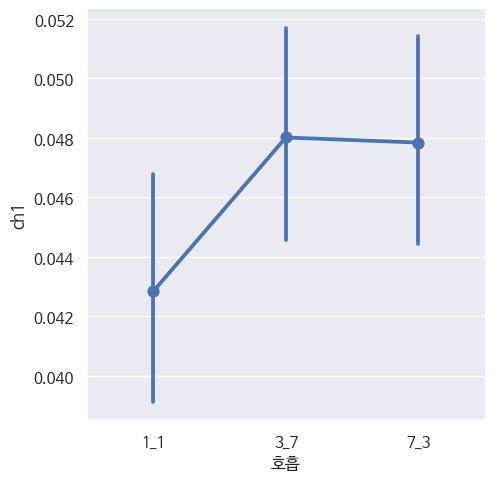

In [13]:
# 그래프
g = sns.catplot(x = "호흡",
                y = "ch1",
                kind = "point",
                data = rma_df)

### 4.2 구형성일때, 차이가 있을때

#### 4.2.1 ANOVA(RM)

In [14]:
# 구형성일때, 차이가 있을때
# correction = False
pg.rm_anova(dv = 'ch2',
            within = '호흡',
            subject = "id",
            correction = False,
            data = rma_df,
            detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,호흡,0.004,2,0.002,4.339,0.014,0.02,0.988
1,Error,0.113,278,0.000,NaN,NaN,NaN,NaN


#### 4.2.2 사후분석(post-hoc, Multicom)

In [15]:
# post-hoc test(RMA)
pg.pairwise_tests(dv = 'ch2',
                  within = '호흡',
                  subject = "id",
                  data = rma_df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,호흡,1_1,3_7,True,True,-2.317,139.0,two-sided,0.022,1.245,-0.270
1,호흡,1_1,7_3,True,True,-2.798,139.0,two-sided,0.006,3.938,-0.326
2,호흡,3_7,7_3,True,True,-0.566,139.0,two-sided,0.572,0.11,-0.070


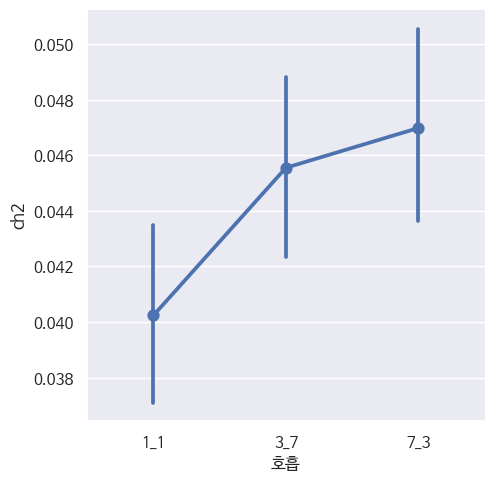

In [16]:
# 그래프
sns.catplot(x = "호흡",
            y = "ch2",
            kind = "point",
            data = rma_df)

## 5.구형성 검정

### 5.1 구형성 검정

In [17]:
# 구형성이면 지금까지 분석한 것이 문제 없음
pg.sphericity(dv = 'ch1',
              within = '호흡',
              subject = "id",
              data = rma_df)

/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


SpherResults(spher=True, W=inf, chi2=-inf, dof=2, pval=1.0)

In [18]:
# 구형성이면 지금까지 분석한 것이 문제 없음
pg.sphericity(dv = 'ch2',
              within = '호흡',
              subject = "id",
              data = rma_df)

/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


SpherResults(spher=True, W=inf, chi2=-inf, dof=2, pval=1.0)

### 5.2 구형성이 아닐 때(Greenhouse-Geisser)

#### 5.2.1 ANOVA(Greenhouse-Geisser)

#### 5.2.2 구형성아닐때 사후분석(post-hoc, Multicom)